In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv("FIFA_train.csv")
df_test = pd.read_csv("FIFA_test.csv")

# 데이터 합치기
df = pd.concat([df_train, df_test], ignore_index=True)
df[::-1]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
12759,16943,K. Fujikawa,19,asia,2021,MF,right,1.0,47,61,2.0,NaN
12758,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0,NaN
12757,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0,NaN
12756,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0,NaN
12755,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0


In [6]:
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [7]:
# 1. 데이터 요약
print("데이터 요약 정보:")
print(df.info(),"\n")

print("\n기술 통계 (수치형 변수):")
print(df.describe(),"\n")

# 2. 결측치 확인
print("\n결측치 확인:")
missing_data = df.isnull().sum()
print(missing_data)

데이터 요약 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12760 non-null  int64  
 1   name              12760 non-null  object 
 2   age               12760 non-null  int64  
 3   continent         12760 non-null  object 
 4   contract_until    12760 non-null  object 
 5   position          12760 non-null  object 
 6   prefer_foot       12760 non-null  object 
 7   reputation        12760 non-null  float64
 8   stat_overall      12760 non-null  int64  
 9   stat_potential    12760 non-null  int64  
 10  stat_skill_moves  12760 non-null  float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.2+ MB
None 


기술 통계 (수치형 변수):
                 id           age    reputation  stat_overall  stat_potential  \
count  12760.000000  12760.000000  12760.000000  12760.

In [20]:
#plot그리기 위해 왼발 오른발 그룹 나눔
left_foot_group = df[df["prefer_foot"] == "left"]
right_foot_group = df[df["prefer_foot"] == "right"]

In [21]:
#전체 행 갯수는
total_rows = print(len(df))
left_foot_rows = print(len(left_foot_group)) # 왼발 그룹
right_foot_rows = print(len(right_foot_group)) # 오른발 그룹

12760
3008
9752


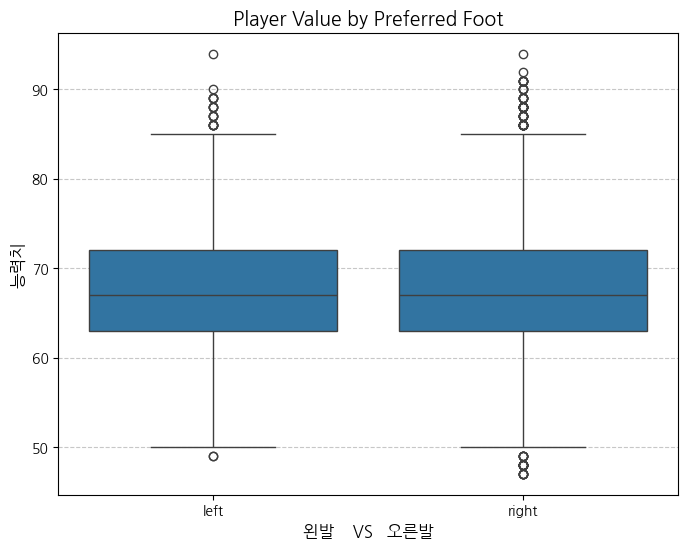

In [22]:
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumGothic')
sns.boxplot(data=df, x="prefer_foot", y="stat_overall")
plt.title("Player Value by Preferred Foot", fontsize=14)
plt.xlabel("왼발    VS   오른발", fontsize=12)
plt.ylabel("능력치", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [29]:
#새로운
from scipy.stats import ttest_ind

# 왼발과 오른발 그룹 추출
left_foot = df[df['prefer_foot'] == 'left']['stat_overall']
right_foot = df[df['prefer_foot'] == 'right']['stat_overall']

# 각 그룹의 평균
mean_left = left_foot.mean()
mean_right = right_foot.mean()

# 독립 표본 t-test 수행
t_stat, p_value = ttest_ind(left_foot, right_foot, equal_var=False)

print("왼발 그룹 평균 :",mean_left)

print("오른발 그룹 평균 :",mean_right)

print("T-test Pvalue :",p_value)

print("\n 결과 : 두 그룹의 차이는 통계적으로 유의미 하다.")

왼발 그룹 평균 : 67.6346409574468
오른발 그룹 평균 : 67.01999589827727
T-test Pvalue : 9.210884038420339e-06

 결과 : 두 그룹의 차이는 통계적으로 유의미 하다.


<Axes: xlabel='stat_overall', ylabel='Count'>

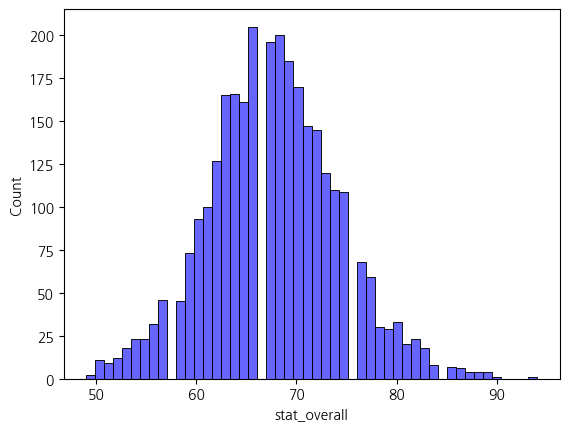

In [34]:
# 왼발 그룹 히스토그램
sns.histplot(left_foot, bins=50, color="blue", label="Left Foot", alpha=0.6)

<Axes: xlabel='stat_overall', ylabel='Count'>

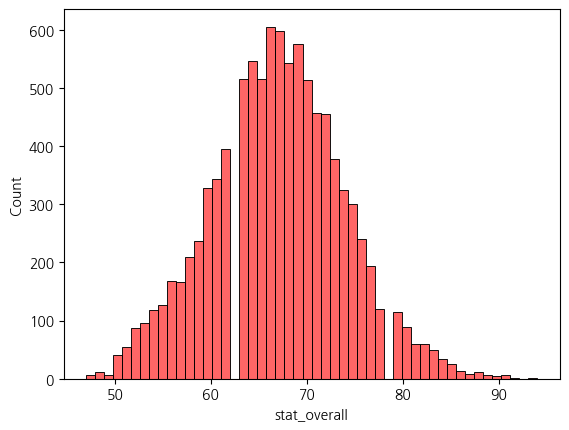

In [33]:
# 오른발 그룹 히스토그램
sns.histplot(right_foot, bins=50, color="red", label="Right Foot", alpha=0.6)

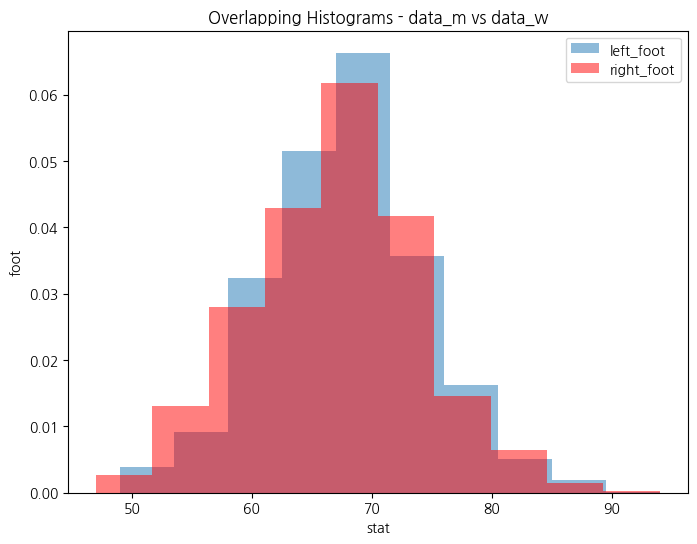

In [44]:
# Modify the code to overlap the histograms for better comparison

plt.figure(figsize=(8, 6))

# Overlapping histograms
plt.hist(left_foot, bins=10, alpha=0.5, label="left_foot", density=True)
plt.hist(right_foot, bins=10, alpha=0.5, label="right_foot", color='red', density=True)

# Adding labels and legend
plt.title("Overlapping Histograms - data_m vs data_w")
plt.xlabel("stat")
plt.ylabel("foot")
plt.legend()

plt.show()

In [45]:
#오른발 그룹 정규성 검증
from scipy.stats import shapiro
from scipy.stats import kstest, norm
from scipy import stats
import numpy as np
import statistics
# right_footed를 numpy 배열로 변환

s ,p1=shapiro(right_foot)
s ,p2=shapiro(left_foot)
print(" 오른발 그룹 shapiro테스트  p-value :",p1)
print(" 왼발 그룹 shapiro테스트  p-value :",p2)
#오른발 그룹이 정규분포를 따르는지 확인해보기 위해 shapiro 테스트를 진행했고 pvalue가 0.05보다 낮았다. 그러나
#sample의 갯수가 9752개로 굉장히 많아 샤피로 테스트의 pevalue값이 낮아진 것으로 보여 다른 테스트들을 사용

 오른발 그룹 shapiro테스트  p-value : 4.002372977311708e-14
 왼발 그룹 shapiro테스트  p-value : 1.6813226366707568e-08


C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_25780\4261707213.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


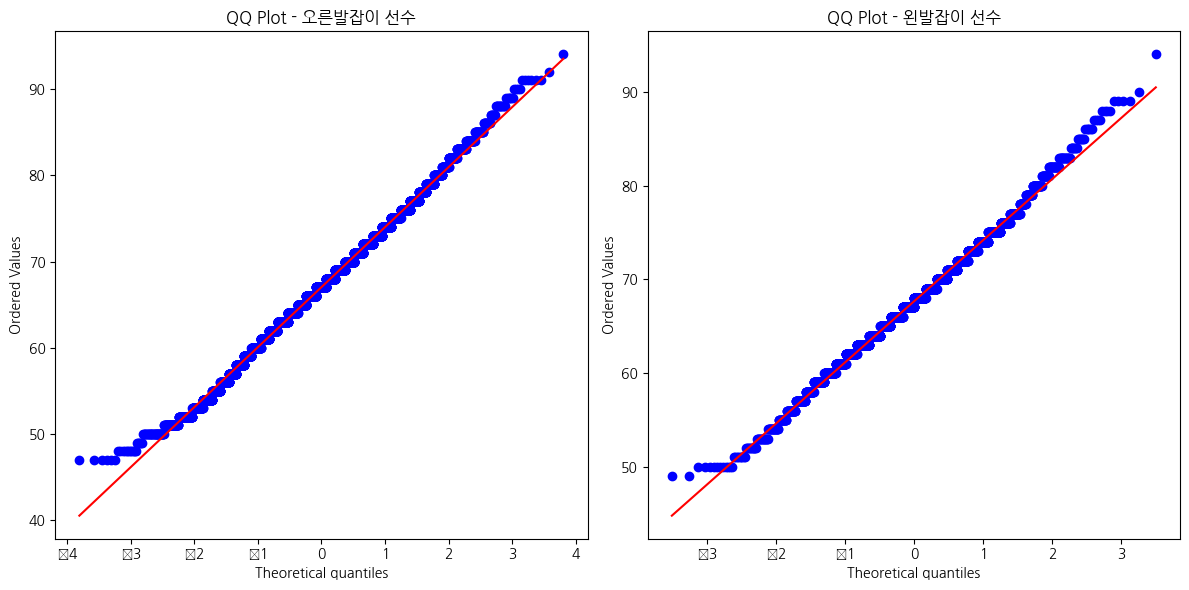

In [52]:
# QQ Plot 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 오른발잡이 선수 QQ Plot
stats.probplot(right_foot, dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot - 오른발잡이 선수")

# 왼발잡이 선수 QQ Plot
stats.probplot(left_foot, dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot - 왼발잡이 선수")

plt.tight_layout()
plt.show()

In [ ]:
#shapiro 와 kstest를 통한 두 그룹의 정규성 확인

In [46]:
print("kstest테스트 결과-------\n")
# 1. 정규분포를 따르는 데이터 (Normal Distribution)
print("만약 정규분포 였다면..")
if_leftnormal_data = np.random.normal(np.mean(left_foot) ,np.std(left_foot) ,3000)
if_rightnormal_data = np.random.normal(np.mean(right_foot) ,np.std(right_foot) ,8000)

stat, p_value=stats.kstest(if_leftnormal_data,"norm",args=(np.mean(left_foot), np.std(left_foot)))
stat, p_value1= stats.kstest(if_rightnormal_data, "norm", args=(np.mean(right_foot), np.std(right_foot)))

print("왼발 그룹은 pvalue:",round(p_value,2))
print("오른발 그룹은 pvalue:",round(p_value1,2))

print("-----------------------------------------\n")
print("실제 데이터는 ")

s,f_left = kstest(left_foot, 'norm', args=(np.mean(left_foot), np.std(left_foot)))
print("왼발 그룹:",f_left)

s,f_right = kstest(right_foot, 'norm', args=(np.mean(right_foot), np.std(right_foot)))
print("오른발 그룹",f_right)
# ks test 역시 샘플 크기가 크면 미세한 차이도 유의미하게 나타날 수 있기 때문에 다른 테스트를 사용해보았다.

kstest테스트 결과-------

만약 정규분포 였다면..
왼발 그룹은 pvalue: 0.39
오른발 그룹은 pvalue: 0.45
-----------------------------------------

실제 데이터는 
왼발 그룹: 5.069118447396366e-06
오른발 그룹 9.22731541988607e-12


In [ ]:
# 두 테스트의 p-value가 낮게 나온 이유는 sample의 갯수가 수 천개이기 때문이다. 
#샘플 크기가 클 때는 일반적인 정규성 검정(Shapiro-Wilk, Kolmogorov-Smirnov, Jarque-Bera 등)이 작은 편차를 유의미하게 검출하여 귀무가설을 기각할 가능성이 커지기 때문에

In [ ]:
# ks test 는 이론적 CDF와 데이터의 CDF 간의 최대 차이를 측정하는 것과 다르게 Anderson-Darling 테스트는 분포의 양 끝에서 발생하는 차이에 더 민감하여, 
#데이터의 양 끝에서 벗어난 차이를 더욱 강하게 반영

In [47]:
from scipy.stats import jarque_bera

s, p_left=jarque_bera(left_foot)
s, p_right=jarque_bera(right_foot)
print("오른발 jarque_bera:",p_left)
print("왼발 jarque_bera:",p_right)

오른발 jarque_bera: 2.2465439249804965e-05
왼발 jarque_bera: 0.07346079822110539


In [48]:
from scipy.stats import anderson
result = anderson(left_footed_values, dist="norm")
print("Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

# 결과 해석
for sl, cv in zip(result.significance_level, result.critical_values):
    print(f"Significance Level {sl}%: Critical Value {cv}")
if result.statistic > result.critical_values[2]:  # 보통 5% 유의 수준 사용
    print("데이터가 정규분포를 따르지 않습니다.")
else:
    print("데이터가 정규분포를 따릅니다.")

Statistic: 4.700853917427594
Critical Values: [0.575 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Significance Level 15.0%: Critical Value 0.575
Significance Level 10.0%: Critical Value 0.655
Significance Level 5.0%: Critical Value 0.786
Significance Level 2.5%: Critical Value 0.917
Significance Level 1.0%: Critical Value 1.091
데이터가 정규분포를 따르지 않습니다.


In [51]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test (비모수적 방법)
u_stat, p_mw = mannwhitneyu(left_foot, right_foot, alternative='two-sided')

u_stat, p_mw

(15344589.5, 0.00012283697243622318)

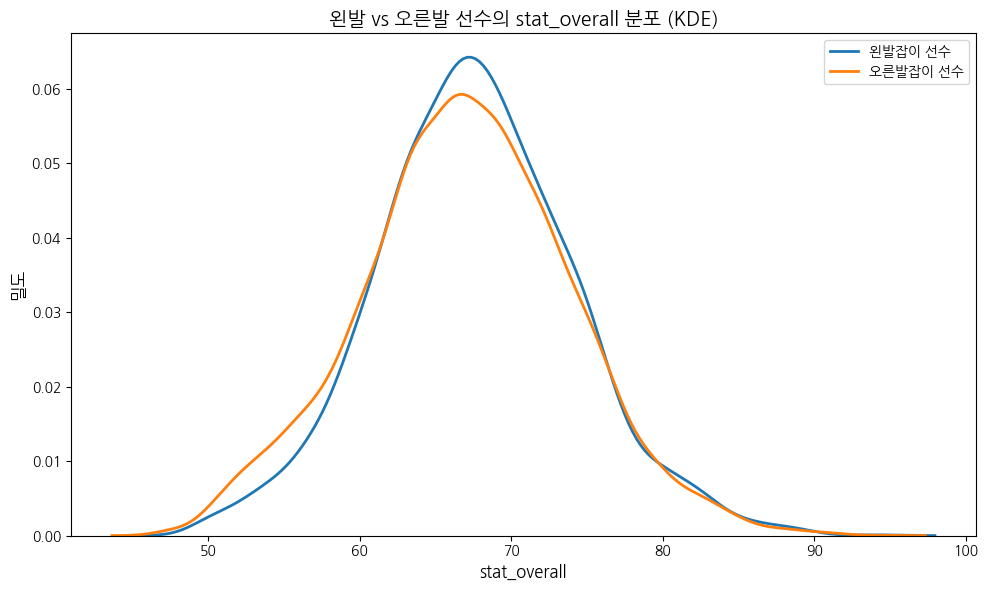

In [50]:
plt.figure(figsize=(10, 6))

sns.kdeplot(left_foot, label="왼발잡이 선수", fill=False, linewidth=2)
sns.kdeplot(right_foot, label="오른발잡이 선수", fill=False, linewidth=2)

plt.title("왼발 vs 오른발 선수의 stat_overall 분포 (KDE)", fontsize=14)
plt.xlabel("stat_overall", fontsize=12)
plt.ylabel("밀도", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
ttest_ind(left_foot, right_foot, equal_var=False)

Ttest_indResult(statistic=4.439254185771714, pvalue=9.210884038420339e-06)